In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
# aaa
import requests
from io import BytesIO
from PIL import Image
import numpy as np

In [2]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

In [3]:
from maskrcnn_benchmark.config import cfg
from predictor import COCODemo

In [4]:
config_file = "../configs/text/e2e_faster_rcnn_X_101_32x8d_FPN_pooler_lr003.yaml"

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cuda"])

In [5]:
coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.5,
)

In [6]:
img_path = '/workspace/coco_style_all_data/images/val/1492430406371.png'
pil_image = Image.open(img_path).convert("RGB")
image = np.array(pil_image)[:, :, [2, 1, 0]]

In [7]:
def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

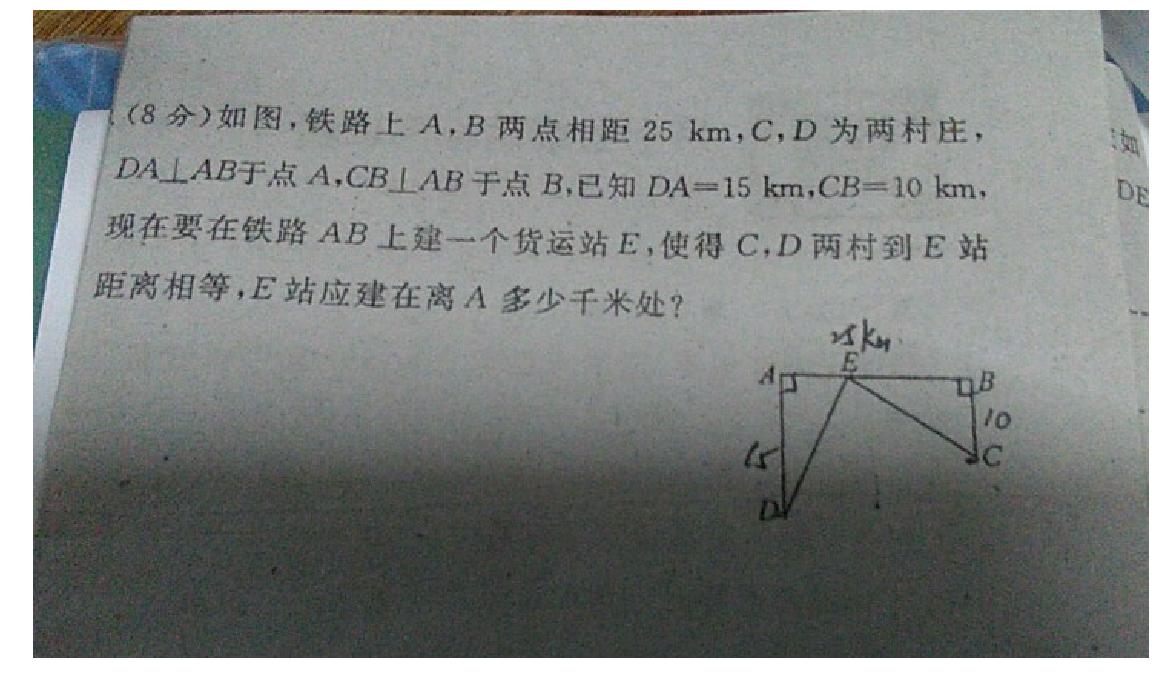

In [8]:
imshow(image)

In [9]:
predictions = coco_demo.run_on_opencv_image(image)

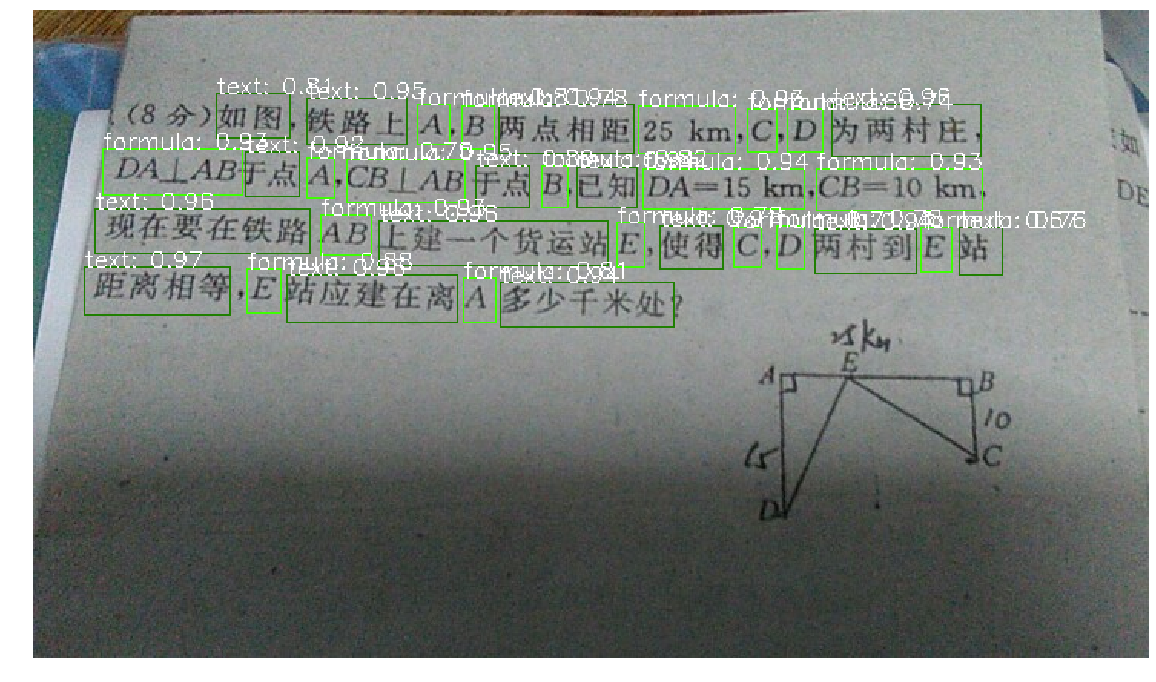

In [10]:
imshow(predictions)

In [11]:
predictions = coco_demo.compute_prediction(image)
top_predictions = coco_demo.select_top_predictions(predictions)

In [12]:
top_predictions.bbox

tensor([[ 33.3232, 167.0468, 128.6732, 198.0789],
        [ 40.2549, 129.6131, 180.3673, 158.4760],
        [165.2440, 172.2248, 276.6977, 203.1654],
        [520.6696,  61.4919, 617.7515,  95.2278],
        [225.0638, 137.8394, 374.5912, 166.1580],
        [178.5473,  57.9380, 243.8456,  87.3599],
        [204.8762,  97.4907, 281.7769, 125.6209],
        [397.9602, 103.3364, 502.1465, 129.8934],
        [303.7264,  61.1854, 391.2670,  93.3921],
        [304.5455, 177.8855, 417.8073, 206.5445],
        [509.0326, 142.4097, 575.4648, 171.1846],
        [354.5806, 102.4869, 393.5245, 128.6972],
        [510.7202, 103.3934, 618.5331, 130.3759],
        [ 45.6799,  90.9387, 136.5848, 120.8273],
        [394.2686,  62.4935, 457.0167,  93.9541],
        [187.2354, 133.4552, 220.8780, 159.6746],
        [138.8797,  92.7913, 173.7511, 121.3103],
        [408.0668, 140.3564, 449.7488, 168.3064],
        [288.5944, 101.0316, 323.3471, 128.0522],
        [139.8090, 168.1154, 161.3412, 197.0336],


In [13]:
top_predictions.extra_fields

{'scores': tensor([0.9694, 0.9631, 0.9597, 0.9589, 0.9551, 0.9503, 0.9454, 0.9425, 0.9420,
         0.9413, 0.9387, 0.9383, 0.9316, 0.9304, 0.9288, 0.9282, 0.9164, 0.9107,
         0.8852, 0.8832, 0.8181, 0.8119, 0.8116, 0.8063, 0.7834, 0.7831, 0.7794,
         0.7608, 0.7528, 0.7354, 0.7070, 0.6735, 0.6557]),
 'labels': tensor([1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2,
         2, 2, 2, 2, 2, 2, 2, 1, 2])}